In [2]:
#import modules
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML
import plotly.express as px

In [3]:
df=pd.read_excel('Customer_Analytics.xlsx') 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#checking if there are any null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
#removing rows with null values
df1=df.dropna()
#verifying that we no longer that null values
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
(df1['Quantity']<0).sum()

8905

In [9]:
#we observe that quantity column has negative values, hence we remove them.
df1= df1[(df1['Quantity']>0)]
#check if the rows are removed with negative quantities
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [10]:
#creating a column to obtain the total amount spent by each customer
df1['Total Price']=df['Quantity'] * df1['UnitPrice'].round(2)

#creating columns to add month, day and hour for analysis
df1['month'] = df1['InvoiceDate'].dt.month
df1['day'] = (df1['InvoiceDate'].dt.dayofweek)+1
df1['hour'] = df1['InvoiceDate'].dt.hour

df1['CustomerID']=df1['CustomerID'].astype('int64')

df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,month,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,3,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,3,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 12 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null int64
Country        397924 non-null object
Total Price    397924 non-null float64
month          397924 non-null int64
day            397924 non-null int64
hour           397924 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 49.5+ MB


In [63]:
#checking the number of orders made by customers
orders=df1.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()
display("The number of orders made by each customer are:",HTML(orders.head(5).to_html()))
print("\n")
#printing the top 10 customers with highest number of orders
orders_max=orders.sort_values(by='InvoiceNo', ascending=False).head(10)
display("The top 10 customers with highest orders are are\n:",HTML(orders_max.to_html()))

#plot graph
fig = px.bar(orders_max, x='Country', y='InvoiceNo',
             hover_data=['Country','CustomerID'], color='InvoiceNo',
             labels={'InvoiceNo':'Count of Orders'}, height=400)
fig.show()

'The number of orders made by each customer are:'

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


'The top 10 customers with highest orders are are\n:'

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


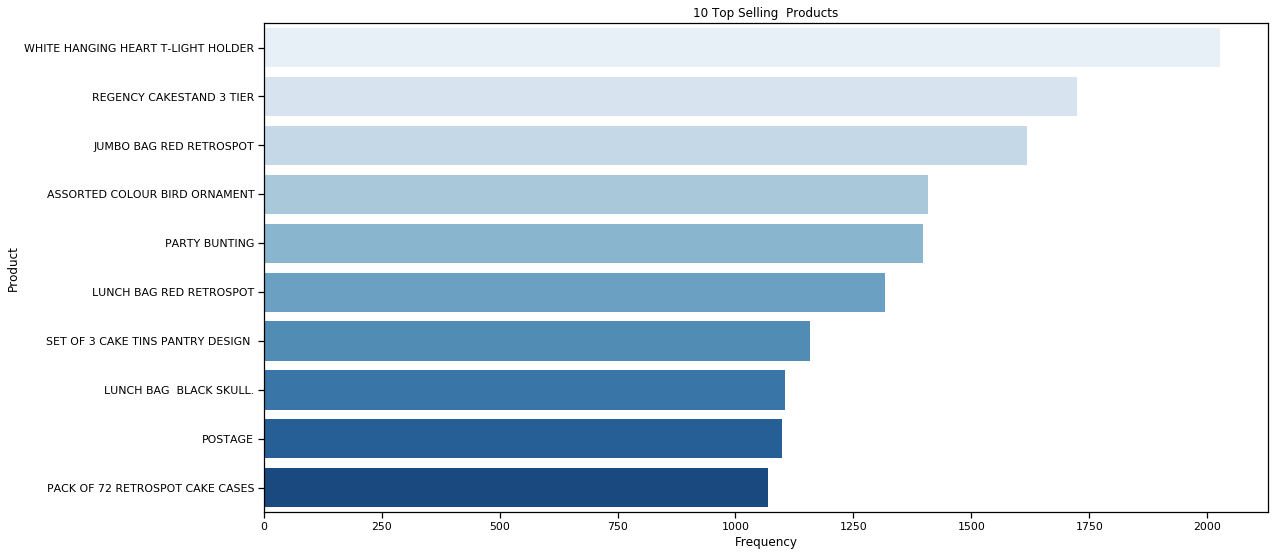

In [78]:
#Top 10 selling products at the store
top_products = df1['Description'].value_counts()[:10]
top_products.head(10)
plt.figure(figsize = (18,9))
sns.set_context("notebook")
sns.barplot(x = top_products.values, y = top_products.index,palette = "Blues")
#plt.xticks(np.arange(0,2501,100),rotation = 90)
plt.xlabel("Frequency")
plt.ylabel("Product")
plt.title("10 Top Selling  Products")
plt.show()

In [15]:
#amount spent by each customer
amount=df1.groupby(by=['CustomerID','Country'],as_index=False)['Total Price'].sum()
display("The total amount spent by each customer is:",HTML(amount.head(5).to_html()))
print("\n")
#printing the top 10 customers with highest number of orders
amount_max=amount.sort_values(by='Total Price', ascending=False).head(10)
display("The top 10 customers with higest amount spent are \n:",HTML(amount_max.to_html()))

#plotting the top 10 customers along with the country they belong to
fig1 = px.bar(amount_max, x='Country', y='Total Price',
             hover_data=['Country','CustomerID'], color='Total Price',
             labels={'Total Price':'Total Price'}, height=400)
fig1.show()

'The total amount spent by each customer is:'

,CustomerID,Country,Total Price
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40


'The top 10 customers with higest amount spent are \n:'

,CustomerID,Country,Total Price
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


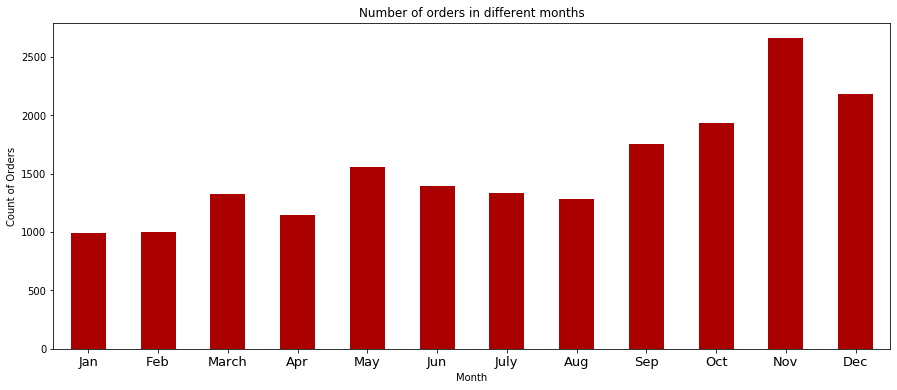

In [16]:
#number of orders per month
x=df1.groupby('InvoiceNo')['month'].unique().value_counts().sort_index().plot(kind='bar',facecolor='#AA0000',figsize=(15,6))
x.set_xlabel('Month')
x.set_ylabel('Count of Orders')
x.set_title('Number of orders in different months')
x.set_xticklabels(('Jan','Feb','March','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show()


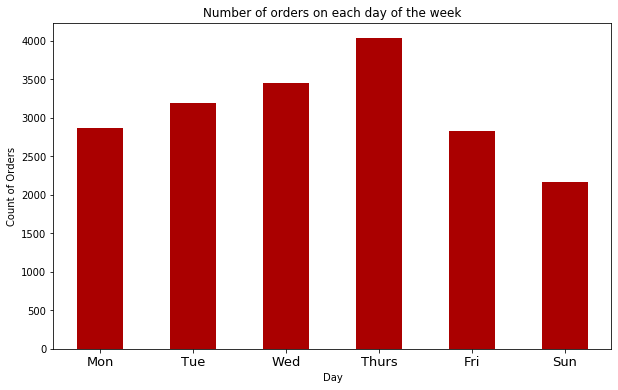

In [17]:
#number of orders per day
orders_day=df1.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',facecolor='#AA0000',figsize=(10,6))
orders_day.set_xlabel('Day')
orders_day.set_ylabel('Count of Orders')
orders_day.set_title('Number of orders on each day of the week')
orders_day.set_xticklabels(('Mon','Tue','Wed','Thurs','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

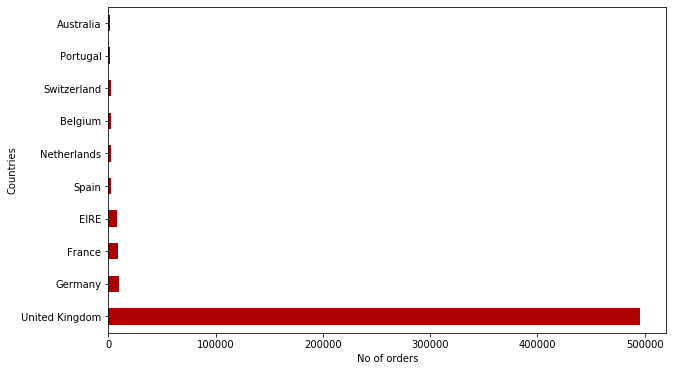

In [19]:
#Top 10 country's customers are from ?
y=df['Country'].value_counts()[:10].plot(kind='barh',facecolor='#AA0000',figsize=(10,6))
y.set_xlabel('No of orders')
y.set_ylabel('Countries')
orders_day.set_title('Top 10 countries with the number of orders')
plt.show()

In [20]:
#understanding the descriptive analytics of Unit Price
df1['UnitPrice'].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [21]:
#showing the data for Unit Price=0; this implies that there were some free items too.
df1_free = df1[df1.UnitPrice == 0]
df1_free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,month,day,hour
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0,12,7,14
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,12,4,14
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,12,2,13
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1,4,16
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,1,4,16


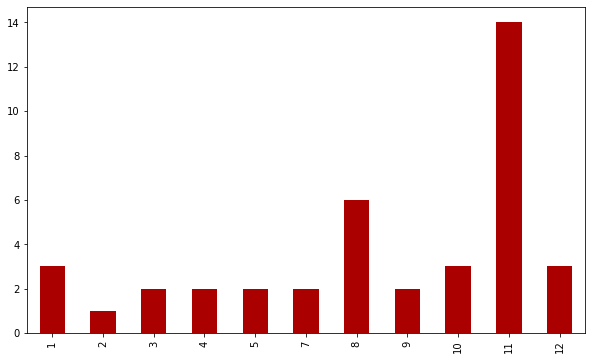

In [22]:
#plotting the graph to show that there were free items given every month
df1_free.month.value_counts().sort_index().plot(kind='bar',facecolor='#AA0000',figsize=(10,6))

In [23]:
#Performing Cohort Analysis
ca=df.copy()
ca.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [32]:
#creating invoice month and cohort month  
def get_month(x):
    return dt.datetime(x.year, x.month, 1)
ca['InvoiceMonth'] = ca['InvoiceDate'].apply(get_month)       #invoice month
ca['CohortMonth'] = ca.groupby('CustomerID')['InvoiceMonth'].transform('min') #cohort month is the first month for a specific Customer when that customer shopped at this online retailer.

#creating cohort index
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoice_year, invoice_month, _ = get_date(ca, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date(ca, 'CohortMonth')
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month
ca['CohortIndex'] = year_diff * 12 + month_diff + 1
ca['CohortIndex'].unique()

array([ 1., nan,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13.])

'Customer Retention by Cohorts'

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


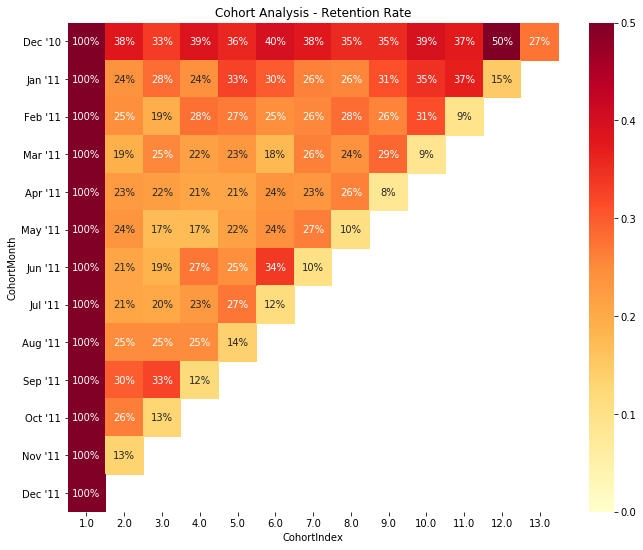

In [62]:
#Calculating Retention Rate
cohort_rr = ca.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = cohort_rr.pivot_table(index = 'CohortMonth',
                                       columns = 'CohortIndex',
                                       values = 'CustomerID')
cohort_count
display("Customer Retention by Cohorts",HTML(cohort_count.to_html()))

#calculating in terms of percentage to understand the retention rate
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size, axis = 0)  
retention.round(3) * 100

month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11", "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", "Oct '11", "Nov '11", "Dec '11"]
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Retention Rate')
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlOrRd",
            yticklabels=month_list)
plt.show()